<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/Fine_tuning_VGG_fruits_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import os,shutil

2.2.0-rc2


In [5]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [9]:
#! ls -la
! ls -la ~/

total 68
drwx------ 1 root root 4096 Apr  5 17:43 .
drwxr-xr-x 1 root root 4096 Apr  5 17:40 ..
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwxr-xr-x 1 root root 4096 Apr  2 16:42 .cache
drwxr-xr-x 1 root root 4096 Apr  2 16:40 .config
drwxr-xr-x 3 root root 4096 Apr  2 16:12 .gsutil
drwxr-xr-x 1 root root 4096 Apr  2 16:40 .ipython
drwx------ 2 root root 4096 Apr  2 16:40 .jupyter
drwxr-xr-x 2 root root 4096 Apr  5 17:44 .kaggle
drwxr-xr-x 2 root root 4096 Apr  5 17:41 .keras
drwx------ 1 root root 4096 Apr  2 16:40 .local
drwxr-xr-x 3 root root 4096 Apr  2 16:40 .node-gyp
drwxr-xr-x 4 root root 4096 Apr  2 16:40 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d sriramr/apples-bananas-oranges

# Unzip all files and suppress output
!unzip -q apples-bananas-oranges.zip

 99% 509M/512M [00:04<00:00, 145MB/s]
100% 512M/512M [00:04<00:00, 126MB/s]


In [12]:
!ls -la

total 524128
drwxr-xr-x 1 root root      4096 Apr  5 17:44 .
drwxr-xr-x 1 root root      4096 Apr  5 17:40 ..
-rw-r--r-- 1 root root 536675406 Apr  5 17:44 apples-bananas-oranges.zip
drwxr-xr-x 1 root root      4096 Apr  2 16:11 .config
-rw-r--r-- 1 root root        64 Apr  5 17:43 kaggle.json
drwxr-xr-x 9 root root      4096 Apr  5 17:44 original_data_set
drwxr-xr-x 1 root root      4096 Mar 18 16:23 sample_data


In [13]:
! ls original_data_set/original_data_set/

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [0]:
# This folder contians all the class folders
main_path = 'original_data_set/original_data_set/'

In [15]:
# all class names
classnames = os.listdir(main_path)
print(classnames)

['freshapples', 'rottenapples', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenbanana']


In [16]:
# See how many images you have per class, this helps you set the required percentage of validation data.
for each_class in classnames:
  print("Class: {}, has {} samples".format( each_class,len(os.listdir(os.path.join(main_path,each_class )))))

Class: freshapples, has 232 samples
Class: rottenapples, has 328 samples
Class: freshoranges, has 206 samples
Class: rottenoranges, has 222 samples
Class: freshbanana, has 218 samples
Class: rottenbanana, has 306 samples


In [0]:
base_dir = "fruits"

In [0]:

total_train_images = 0
total_val_images = 0


In [0]:
os.mkdir(base_dir)

In [20]:
train_dir = os.path.join(base_dir, "train")
print(train_dir)

fruits/train


In [21]:
!ls

apples-bananas-oranges.zip  fruits  kaggle.json  original_data_set  sample_data


In [0]:
os.mkdir(train_dir)

In [0]:
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)

# Set the percent of validation data you want.
validation_percent = 15


For Training a custom data-set you need to collect images and keep them in 2 separate folders named "apples" "oranges" "bananas". 
You need to create 2 folders - one which contains the training images and the other one will be used for validation. 
Each folder contains subfolders with the classes. For example:-
/train
 -apples
 -oranges
 -bananas
/validation
 -apples
 -oranges
 -bananas

In [24]:

for each_class in classnames:

  source_directory = os.path.join(main_path,each_class )
  destination_train_directory = os.path.join(train_dir,each_class)
  destination_validation_directory = os.path.join(validation_dir,each_class)


  total_image_count = len(os.listdir(source_directory))

  valid_image_count = int(np.floor(total_image_count * (validation_percent/100)))

  train_images_count = int( total_image_count - valid_image_count )

  total_train_images +=  train_images_count
  total_val_images += valid_image_count

  os.mkdir(destination_train_directory)
  os.mkdir(destination_validation_directory)

  # copying the data to class's train folder
  file_names = os.listdir(source_directory)[:train_images_count]

  for fname in file_names:
      src = os.path.join(source_directory, fname)
      dst = os.path.join(destination_train_directory, fname)
      shutil.copyfile(src, dst)


  # Copying the data to class's validation folder
  file_names = os.listdir(source_directory)[train_images_count:]

  for fname in file_names:
      src = os.path.join(source_directory, fname)
      dst = os.path.join(destination_validation_directory, fname)
      shutil.copyfile(src, dst)
  
  print('total training {} images: {}'.format(each_class, len(os.listdir(destination_train_directory))))
  print('total validation {} images: {}'.format(each_class, len(os.listdir(destination_validation_directory))))

total training freshapples images: 198
total validation freshapples images: 34
total training rottenapples images: 279
total validation rottenapples images: 49
total training freshoranges images: 176
total validation freshoranges images: 30
total training rottenoranges images: 189
total validation rottenoranges images: 33
total training freshbanana images: 186
total validation freshbanana images: 32
total training rottenbanana images: 261
total validation rottenbanana images: 45


In [25]:
! ls fruits/train/

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [26]:
! ls fruits/validation/

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


# Transfer Learning Experiment 1: Freezing all layers (just changing the FC and o/p layer), 
No data augmentation.

In [27]:
from tensorflow.keras.applications import VGG16
image_size = 224

#Load the VGG model
# include_top=False indicated CNN layers are not trained.
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)



58892288/58889256 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f937fa97cc0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937fa560f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937fa56908> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f937f20da90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937f20d940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93701649b0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f937016c3c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9370177c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9370177dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937017e588> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f93701854a8> Fals

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classnames), activation='softmax'))

# Here the o/p layer has len = 6

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 6,424,326
Non-trainable params: 14,714,688
_________________________________________________________________


Setup the data generators
We have already separated the data into train and validation and kept it in the “train” and “validation” folders. We can use ImageDataGenerator available in Keras to read images in batches directly from these folders and optionally perform data augmentation. We will use two different data generators for train and validation folders.

In [29]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 20

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1289 images belonging to 6 classes.
Found 223 images belonging to 6 classes.


In [30]:
print(train_dir)
print(validation_dir)


fruits/train
fruits/validation


Train the model :
Till now, we have created the model and set up the data for training. So, we should proceed with the training and check out the performance. We will have to specify the optimizer and the learning rate and start training using the model.fit() function. After the training is over, we will save the model.

In [31]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
65/64 [==============================] - 11s 168ms/step - loss: 0.9919 - acc: 0.6199 - val_loss: 1.3198 - val_acc: 0.6637
Epoch 2/20
65/64 [==============================] - 10s 158ms/step - loss: 0.4359 - acc: 0.8448 - val_loss: 0.3161 - val_acc: 0.9238
Epoch 3/20
65/64 [==============================] - 10s 156ms/step - loss: 0.3018 - acc: 0.8883 - val_loss: 0.2867 - val_acc: 0.9238
Epoch 4/20
65/64 [==============================] - 10s 157ms/step - loss: 0.2503 - acc: 0.9154 - val_loss: 0.2926 - val_acc: 0.8879
Epoch 5/20
65/64 [==============================] - 10s 156ms/step - loss: 0.1536 - acc: 0.9496 - val_loss: 0.2324 - val_acc: 0.9148
Epoch 6/20
65/64 [==============================] - 10s 156ms/step - loss: 0.1437 - acc: 0.9550 - val_loss: 0.2619 - val_acc: 0.9058
Epoch 7/20
65/64 [==============================] - 10s 154ms/step - loss: 0.1185 - acc: 0.9581 - val_loss: 0.2324 - val_acc: 

In [0]:
# Save the Model
model.save('all_freezed.h5')

In [33]:
!ls

all_freezed.h5		    fruits	 original_data_set
apples-bananas-oranges.zip  kaggle.json  sample_data


# Check Performance

Let us see the loss and accuracy curves

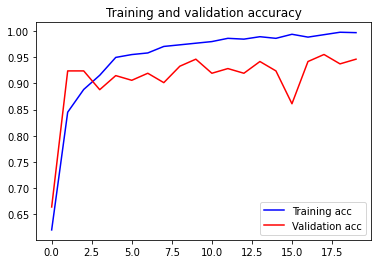

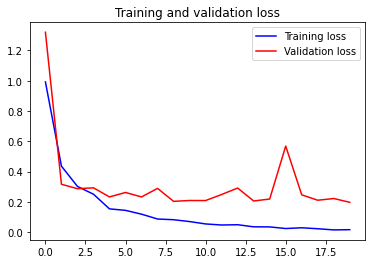

In [34]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Show the errors

Found 223 images belonging to 6 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
12/11 [================================] - 1s 115ms/step
No of errors = 12/223


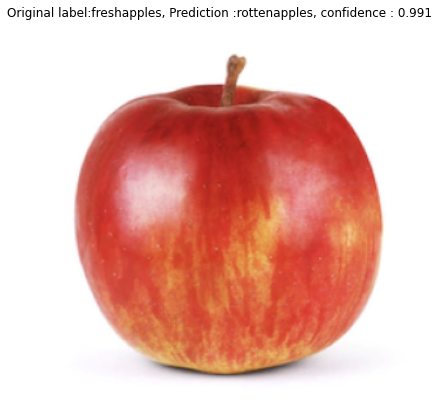

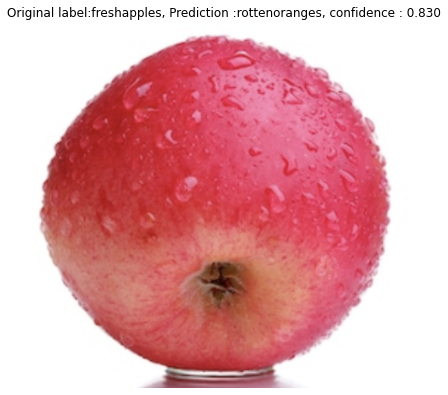

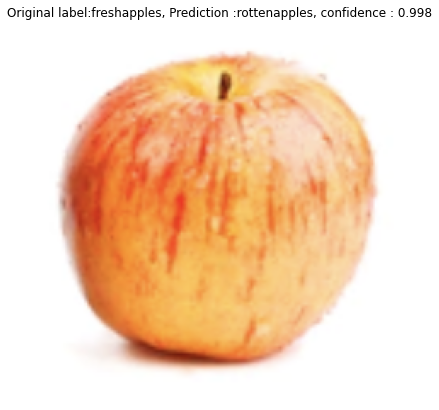

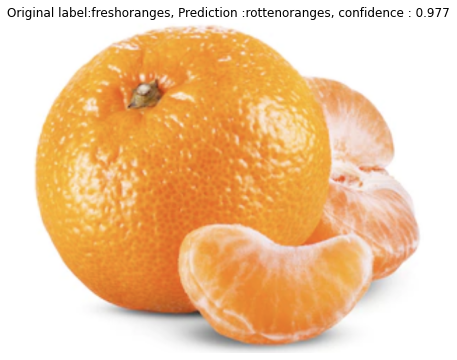

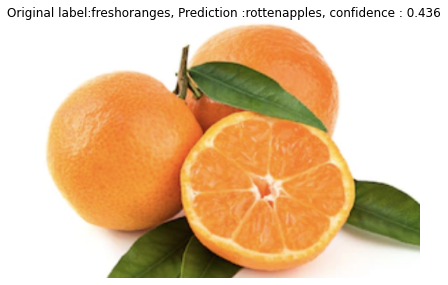

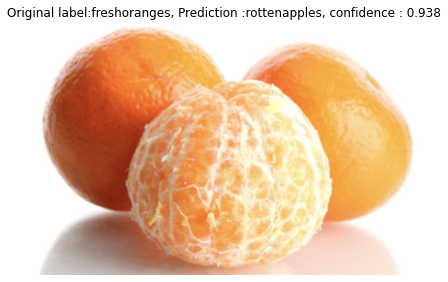

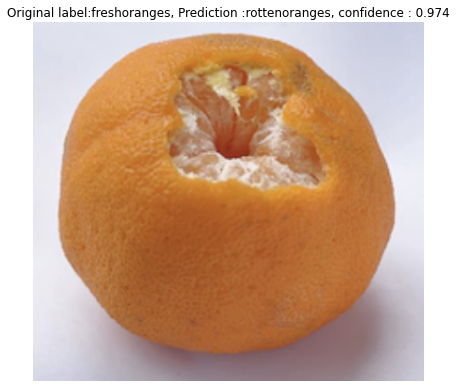

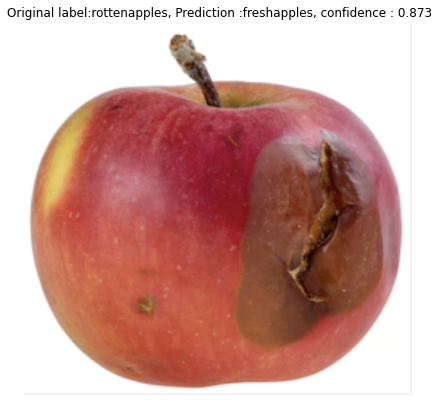

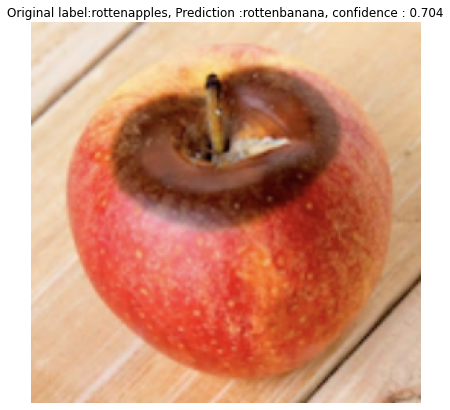

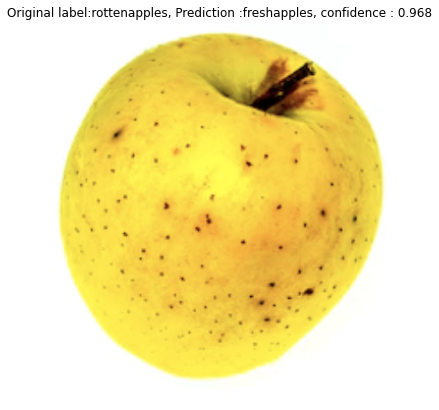

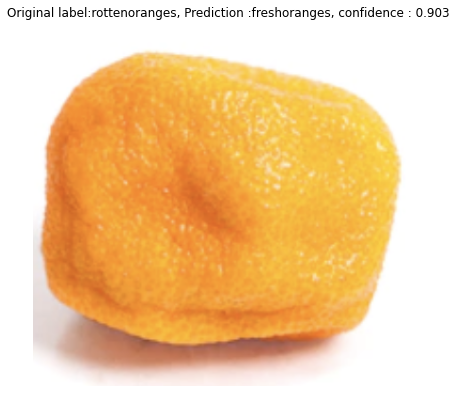

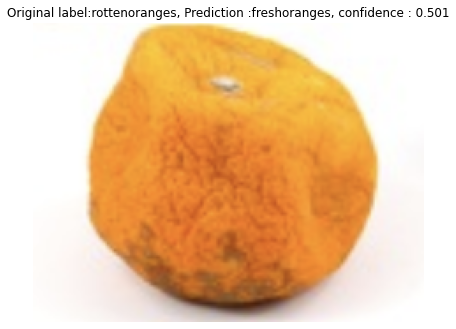

In [35]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

#Experiment 2 : Train Last 4 layers without data augmentation

In this experiment, we will keep the initial layers fixed and only retrain the last 4 layers. Since the initial layers learn more general features, it is a good practice to freeze the initial layers while fine-tuning the latter layers of the network for the new task.

In [36]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all layers except the last 4
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f937fa97438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937fa972b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f937fa979b0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f93424e1be0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93327f99e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9332f0c780> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9332f76940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9332f767b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9332f74b00> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9332f5c278> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9332f52898> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [37]:
# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classnames), activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 13,503,750
Non-trainable params: 7,635,264
_________________________________________________________________


In [38]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 20

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


Found 1289 images belonging to 6 classes.
Found 223 images belonging to 6 classes.
Epoch 1/20
26/25 [==============================] - 10s 402ms/step - loss: 1.0950 - acc: 0.6043 - val_loss: 0.4409 - val_acc: 0.8430
Epoch 2/20
26/25 [==============================] - 10s 375ms/step - loss: 0.3740 - acc: 0.8627 - val_loss: 0.5556 - val_acc: 0.8072
Epoch 3/20
26/25 [==============================] - 10s 374ms/step - loss: 0.2118 - acc: 0.9325 - val_loss: 0.3830 - val_acc: 0.8789
Epoch 4/20
26/25 [==============================] - 10s 370ms/step - loss: 0.1630 - acc: 0.9488 - val_loss: 0.2067 - val_acc: 0.9283
Epoch 5/20
26/25 [==============================] - 10s 375ms/step - loss: 0.0591 - acc: 0.9860 - val_loss: 0.2588 - val_acc: 0.9372
Epoch 6/20
26/25 [==============================] - 10s 379ms/step - loss: 0.0736 - acc: 0.9798 - val_loss: 1.7517 - val_acc: 0.7309
Epoch 7/20
26/25 [==============================] - 10s 375ms/step - loss: 0.1171 - acc: 0.9705 - val_loss: 0.2437 - va

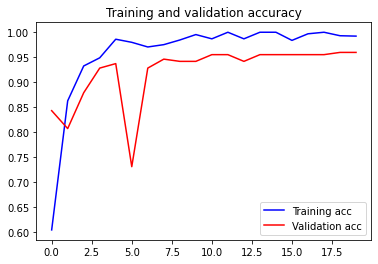

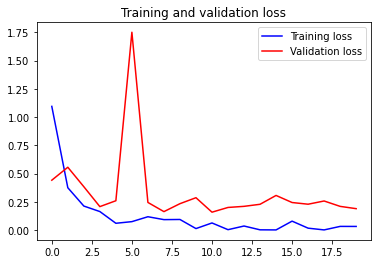

In [39]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Show the errors

Found 223 images belonging to 6 classes.
12/11 [================================] - 1s 115ms/step
No of errors = 9/223


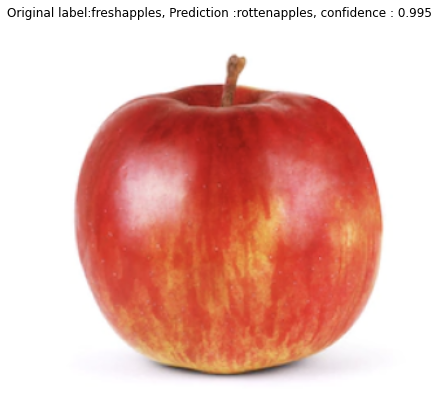

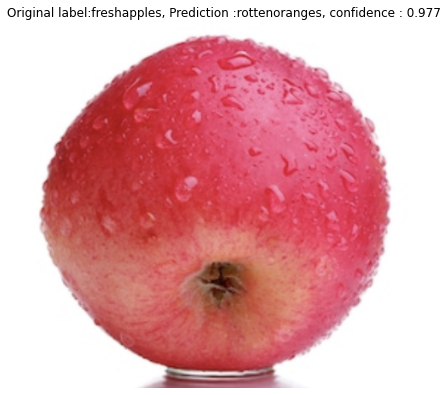

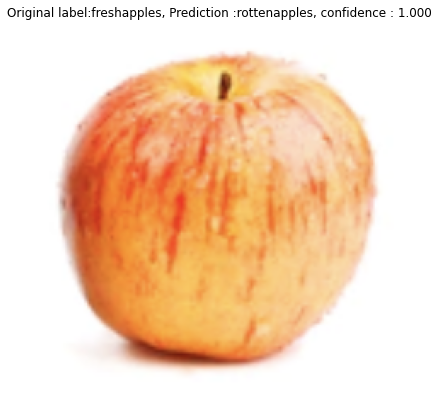

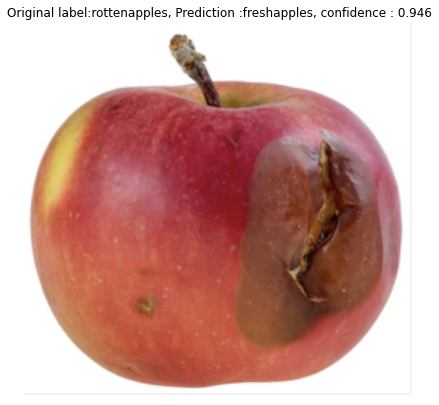

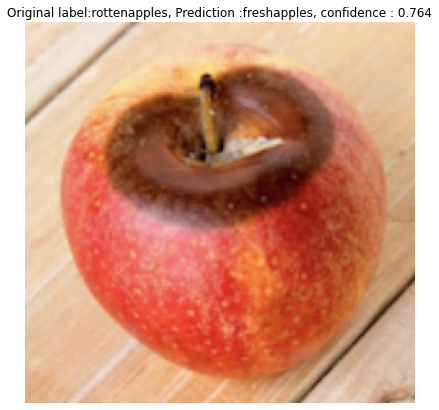

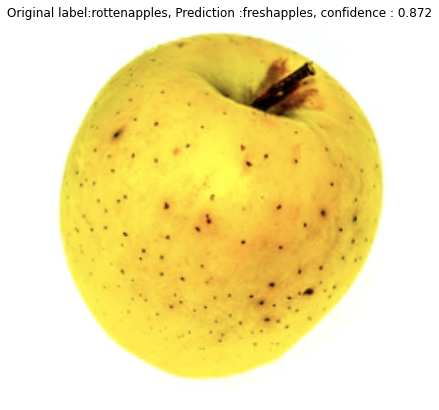

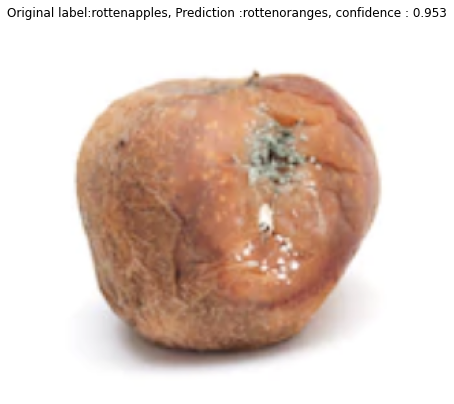

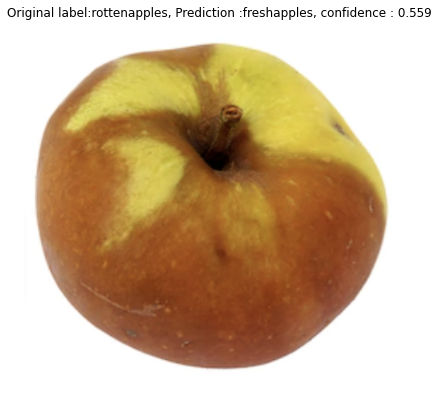

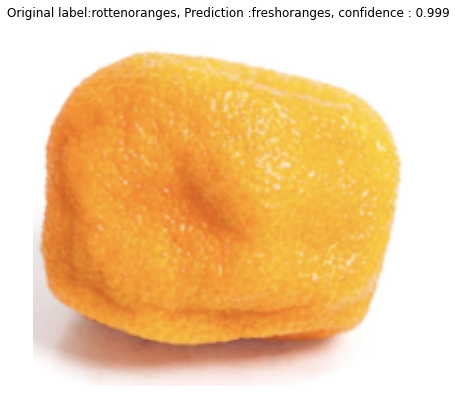

In [40]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [41]:
!ls 

all_freezed.h5		    fruits	 original_data_set
apples-bananas-oranges.zip  kaggle.json  sample_data


In [42]:
! ls -la fruits/train

total 144
drwxr-xr-x 8 root root  4096 Apr  5 17:45 .
drwxr-xr-x 4 root root  4096 Apr  5 17:45 ..
drwxr-xr-x 2 root root 20480 Apr  5 17:45 freshapples
drwxr-xr-x 2 root root 20480 Apr  5 17:45 freshbanana
drwxr-xr-x 2 root root 20480 Apr  5 17:45 freshoranges
drwxr-xr-x 2 root root 28672 Apr  5 17:45 rottenapples
drwxr-xr-x 2 root root 28672 Apr  5 17:45 rottenbanana
drwxr-xr-x 2 root root 20480 Apr  5 17:45 rottenoranges


# Experiment 3 : Train last 8 layers with data augmentation
the previous methods show Overfitting hence data augmentaion.

In [43]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-8]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classnames), activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f93328e8400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93328e2160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f933291c048> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9332888978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f933258f7b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93325a1e48> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f93325ae400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93325a1e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f933258f828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f93325b6f60> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f93325445c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [44]:
# imageDataGenerator is used for data augmentation.
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 20

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Found 1289 images belonging to 6 classes.
Found 223 images belonging to 6 classes.
Epoch 1/20
52/51 [==============================] - 45s 872ms/step - loss: 1.5346 - acc: 0.3922 - val_loss: 0.9987 - val_acc: 0.6413
Epoch 2/20
52/51 [==============================] - 45s 871ms/step - loss: 0.7797 - acc: 0.7207 - val_loss: 0.5868 - val_acc: 0.8520
Epoch 3/20
52/51 [==============================] - 45s 869ms/step - loss: 0.5028 - acc: 0.8402 - val_loss: 0.3735 - val_acc: 0.9148
Epoch 4/20
52/51 [==============================] - 45s 874ms/step - loss: 0.3223 - acc: 0.9034 - val_loss: 0.1678 - val_acc: 0.9372
Epoch 5/20
52/51 [==============================] - 45s 869ms/step - loss: 0.3007 - acc: 0.9116 - val_loss: 0.5128 - val_acc: 0.8430
Epoch 6/20
52/51 [==============================] - 45s 869ms/step - loss: 0.2683 - acc: 0.9286 - val_loss: 0.1240 - val_acc: 0.9686
Epoch 7/20
52/51 [==============================] - 45s 867ms/step - loss: 0.3006 - acc: 0.9306 - val_loss: 0.3001 - va

Note above training takes more time since 8 layers are being un-freezed!

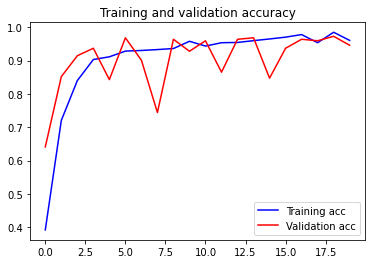

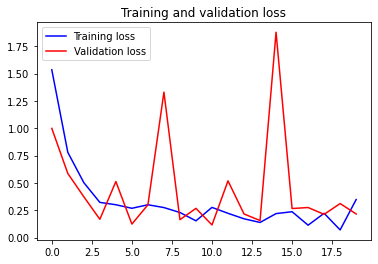

In [45]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 223 images belonging to 6 classes.
12/11 [================================] - 1s 114ms/step
No of errors = 12/223


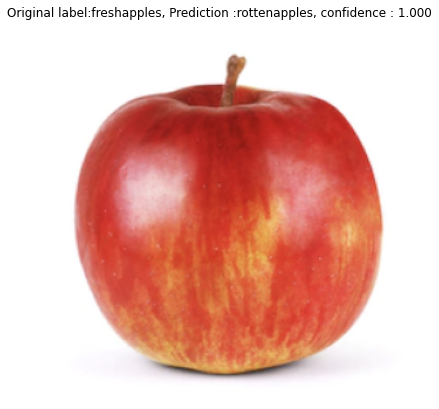

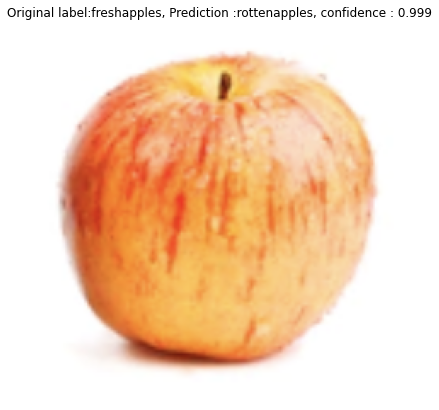

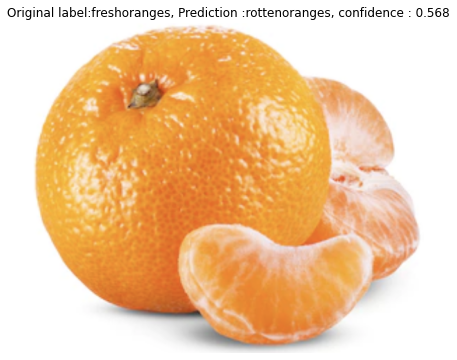

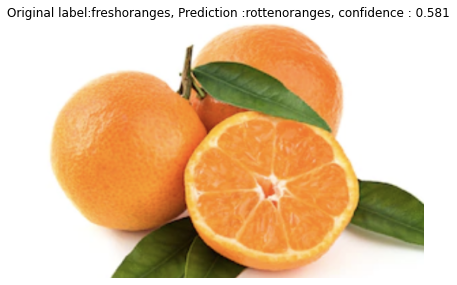

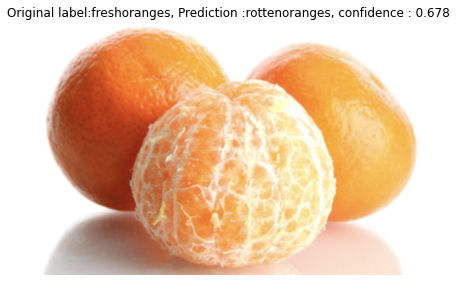

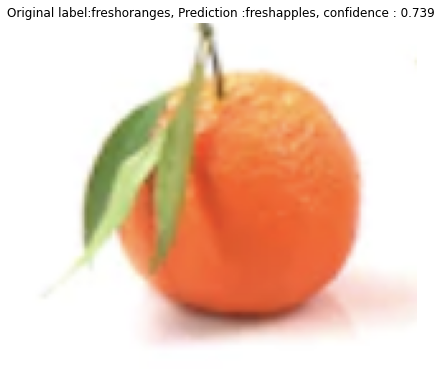

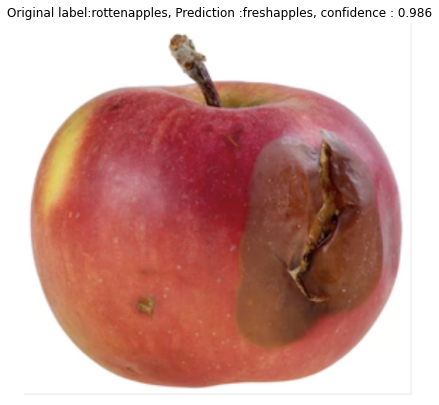

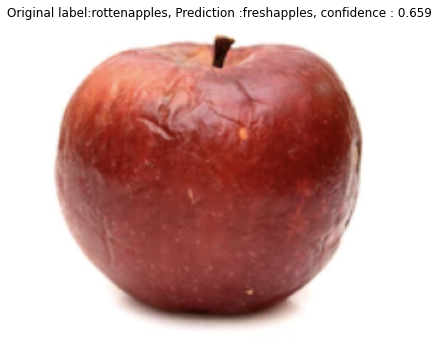

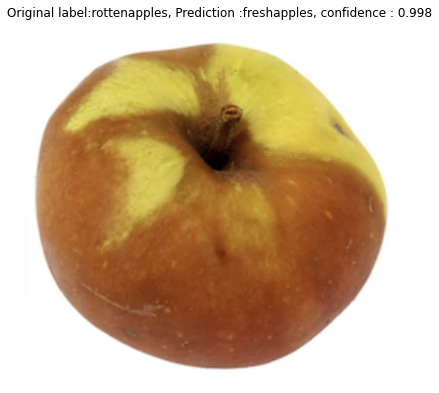

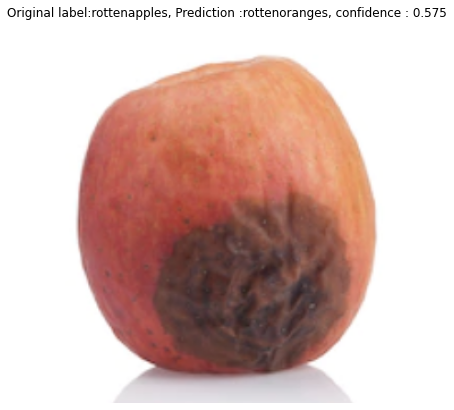

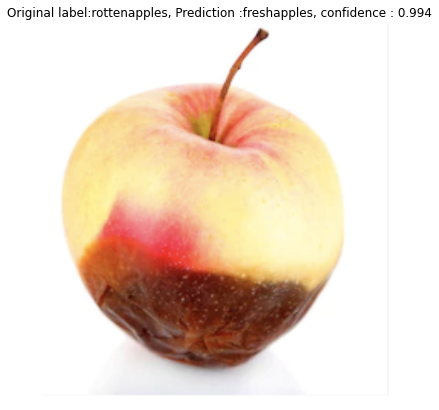

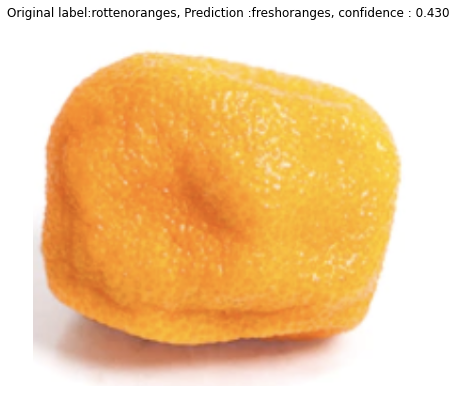

In [46]:
# Show the errors

# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [47]:
!pwd

/content


In [48]:
!ls

all_freezed.h5		    fruits	 original_data_set
apples-bananas-oranges.zip  kaggle.json  sample_data
